In [5]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [6]:
# Study data files
question4_df_path = "data/question4_df.csv"
disasters_clean_path = "data/disasters_clean.csv"

# Read the mouse data and the study results
question4_dfdata = pd.read_csv(question4_df_path)
disasters_cleandata   = pd.read_csv(disasters_clean_path)

# Combine the data into a single dataset
combined_q4_data = pd.merge(question4_dfdata, disasters_cleandata, on="country")

# Display the data table for preview
combined_q4_data

,country,region_x,year_x,avg_precip,avg_temp_c,avg_temp_f,iso_x,co2,methane,nitrous_oxide,...,continent,disaster group,disaster subgroup,disaster type,disaster subtype,disaster subsubtype,total deaths,total affected,latitude,longitude
0,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Climatological,Drought,Drought,NaN,37.0,2580000.0,NaN,NaN
1,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,NaN,36.424,70.881
2,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Meteorological,Extreme temperature,Cold wave,NaN,150.0,100000.0,NaN,NaN
3,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Geophysical,Earthquake,Ground movement,NaN,4.0,270.0,35.169,69.389
4,Afghanistan,South Asia,2000,NaN,15.822667,60.4808,AFG,0.758,10.59,3.62,...,Asia,Natural,Meteorological,Extreme temperature,Cold wave,NaN,177.0,100000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44025,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Convective storm,Lightning/Thunderstorms,31.0,2000.0,NaN,NaN
44026,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Tropical cyclone,NaN,251.0,113023.0,NaN,NaN
44027,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Meteorological,Storm,Tropical cyclone,NaN,628.0,270186.0,NaN,NaN
44028,Zimbabwe,Sub-Saharan Africa,2013,NaN,19.756500,67.5617,ZWE,11.617,12.08,6.67,...,Africa,Natural,Climatological,Drought,Drought,NaN,NaN,6900000.0,NaN,NaN


In [7]:
#Check what countries
unique_countries = combined_q4_data['country'].unique()
unique_countries

array(['Afghanistan', 'Angola', 'Australia', 'Bangladesh', 'Brazil',
       'Canada', 'Chile', 'China', 'Colombia', 'Germany', 'Spain',
       'Ethiopia', 'France', 'Indonesia', 'India', 'Iraq', 'Italy',
       'Japan', 'Kenya', 'Morocco', 'Mexico', 'Nigeria', 'Pakistan',
       'Peru', 'Saudi Arabia', 'Senegal', 'Somalia', 'Thailand', 'Turkey',
       'Ukraine', 'South Africa', 'Zimbabwe'], dtype=object)

In [31]:
combined_q4_data[combined_q4_data['year_x']==2000]['avg_temp_f'].unique()

array([60.4808    , 75.9386    , 60.69875   , 78.62945   , 74.5033    ,
       42.630575  , 42.70595   , 54.8234    , 70.012775  , 51.7346    ,
       53.9654    , 64.83425   , 53.1314    , 81.1772    , 79.58023571,
       75.0134    , 56.16365   , 58.25255   , 62.12225   , 64.6946    ,
       61.00505   , 80.0901    , 78.65795   , 62.6327    , 81.2573    ,
       77.4668    , 82.01735   , 81.5414    , 57.59015   , 47.87375   ,
       66.100475  , 68.5106    ])

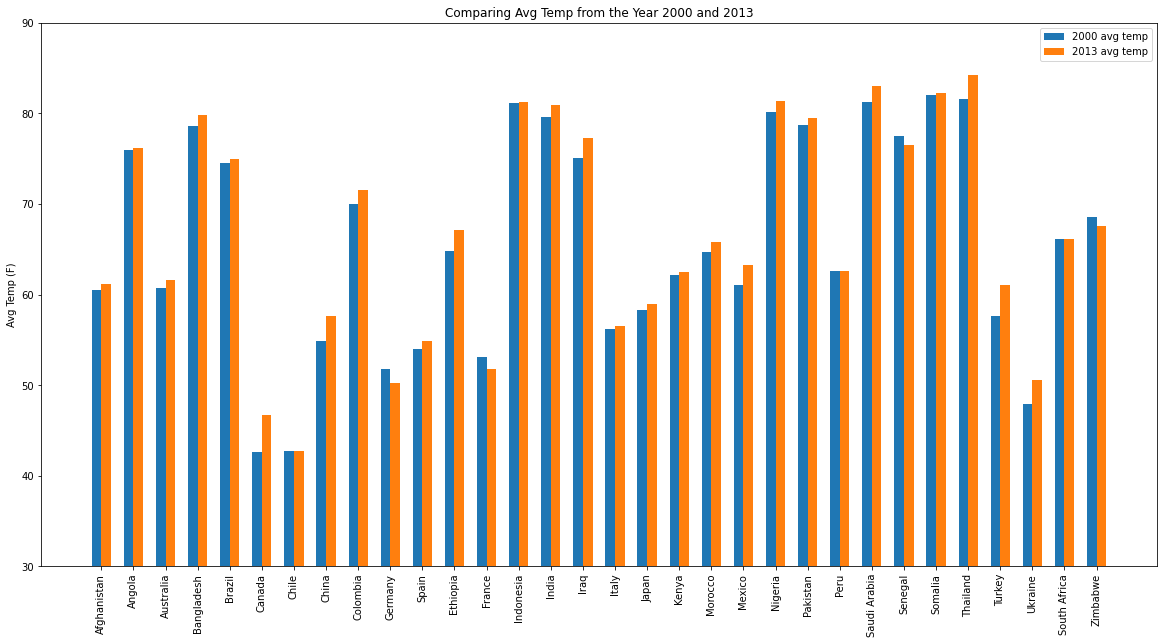

In [32]:
#Separate data into labels, avgtemp_2000 and avgtemp_2013
labels = unique_countries
avgtemp_2000 = combined_q4_data[combined_q4_data['year_x']==2000]['avg_temp_f'].unique()
avgtemp_2013 = combined_q4_data[combined_q4_data['year_x']==2013]['avg_temp_f'].unique()

#Create label locations and width of bars
x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, avgtemp_2000, width, label='2000 avg temp')
rects2 = ax.bar(x + width/2, avgtemp_2013, width, label='2013 avg temp')

#Add some labels and customize 
ax.set_ylabel('Avg Temp (F)')
ax.set_title('Comparing Avg Temp from the Year 2000 and 2013')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
ax.set_ylim(30,90)

fig.tight_layout

plt.show()

([<matplotlib.axis.XTick at 0x7f97ab725a20>,
 <a list of 20 Text major ticklabel objects>)

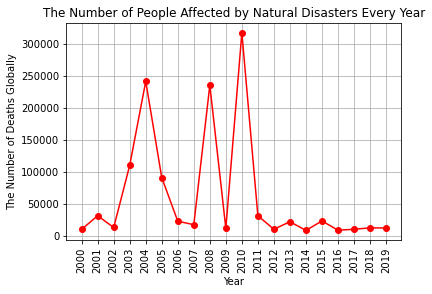

In [70]:
#Calculate total deaths globally per year
total_deaths_list = []
years = disasters_cleandata['year'].unique()
for year in years:
    subset = disasters_cleandata[disasters_cleandata['year']==year]
    total = np.sum(subset['total deaths'])
    total_deaths_list.append(total)
total_deaths_list

#Create line plot
plt.plot(years, total_deaths_list, color='r', marker='o')
plt.title("The Number of People Affected by Natural Disasters Every Year")
plt.ylabel("The Number of Deaths Globally")
plt.xlabel("Year")
plt.grid(True)

plt.xticks(years, rotation="vertical")

In [73]:
len(disasters_cleandata['year'])

7351

([<matplotlib.axis.XTick at 0x7f97a9d66a20>,
 <a list of 20 Text major ticklabel objects>)

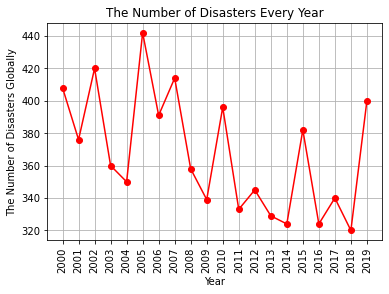

In [78]:
#Calculate total deaths globally per year
total_disasters_list = []
years = disasters_cleandata['year'].unique()
for year in years:
    subset = disasters_cleandata[disasters_cleandata['year']==year]
    total = len(subset['year'])
    total_disasters_list.append(total)
total_disasters_list

#Create line plot
plt.plot(years, total_disasters_list, color='r', marker='o')
plt.title("The Number of Disasters Every Year")
plt.ylabel("The Number of Disasters Globally")
plt.xlabel("Year")
plt.grid(True)

plt.xticks(years, rotation="vertical")